# Project: Selecting the Best Location for a New Oil Well

## Introduction

OilyGiant is a mining company focused on selecting optimal locations for oil extraction. The task is to develop a model to predict oil well reserves and select the most profitable location for a new well among three regions. We'll analyze the oil samples and predict the volume of reserves in new wells. The project will involve:

- Collecting and preparing data from the three regions.
- Building a linear regression model to predict oil reserves.
- Calculating profit and analyzing potential risks.
- Recommending the best region with the highest profit margin and lowest risk.

We’ll use bootstrapping to estimate profits and risks. The objective is to ensure a positive return while minimizing the risk of loss below 2.5%.

## Import Libraries 

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from numpy.random import RandomState
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Data

We will begin by loading the data sets and checking for dupilcates and missing values

In [31]:
# Load the datasets
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')


In [32]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


The `geo_data_0` dataset contains 10000 rows and 5 columns: 

- `id` — unique oil well identifier
- `f0` — feature of well
- `f1` — feature of well
- `f2` — feature of well
- `product` — volume of reserves in the oil well (thousand barrels)

Each column contains 10000 non-null values indicating no missing values 

In [33]:
#Verify no missing values
geo_data_0.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [34]:
#Check for duplicates
geo_data_0.duplicated().sum()

0

There are no duplicates in the `geo_data_0` dataset

In [35]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


The `geo_data_1` dataset contains the same columns and number of rows as `geo_data_0`

Each column contains 10000 non-null values indicating no missing values

In [36]:
#Verify no missing values
geo_data_1.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [37]:
#Check for duplicates
geo_data_1.duplicated().sum()

0

There are no duplicates in the `geo_data_1` dataset

In [38]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


The `geo_data_2` dataset contains the same columns and number of rows as `geo_data_0` and `geo_data_1`

Each column contains 10000 non-null values indicating no missing values

In [39]:
#Verify no missing values
geo_data_2.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [40]:
#Check for duplicates
geo_data_2.duplicated().sum()

0

There are no duplicates in the `geo_data_2` dataset

## Exploratory Data Analysis 

Now we will explore the data futher, making sure there is no duplicates in the `id` column and and analyzing the distribution in each dataframe. 

In [41]:
# Check for duplicates in the 'id' column in each dataset
id_duplicates_0 = geo_data_0['id'].duplicated().sum()
id_duplicates_1 = geo_data_1['id'].duplicated().sum()
id_duplicates_2 = geo_data_2['id'].duplicated().sum()

print(f"Number of duplicate ids in geo_data_0: {id_duplicates_0}")
print(f"Number of duplicate ids in geo_data_1: {id_duplicates_1}")
print(f"Number of duplicate ids in geo_data_2: {id_duplicates_2}")


Number of duplicate ids in geo_data_0: 10
Number of duplicate ids in geo_data_1: 4
Number of duplicate ids in geo_data_2: 4


<b>Duplicate ID Check:</b>

- geo_data_0 contains 10 duplicate IDs.
- geo_data_1 contains 4 duplicate IDs.
- geo_data_2 contains 4 duplicate IDs.

Duplicate IDs can indicate that some oil wells may be repeated, which could introduce bias or inaccuracies in model training. Therefore, it is essential to remove these duplicates before further analysis or modeling.

In [42]:
# Remove duplicates based on 'id' column in each dataset
geo_data_0_clean = geo_data_0.drop_duplicates(subset=['id'])
geo_data_1_clean = geo_data_1.drop_duplicates(subset=['id'])
geo_data_2_clean = geo_data_2.drop_duplicates(subset=['id'])

# Verify the number of remaining rows
print(f"Number of rows after removing duplicates in geo_data_0: {len(geo_data_0_clean)}")
print(f"Number of rows after removing duplicates in geo_data_1: {len(geo_data_1_clean)}")
print(f"Number of rows after removing duplicates in geo_data_2: {len(geo_data_2_clean)}")


Number of rows after removing duplicates in geo_data_0: 99990
Number of rows after removing duplicates in geo_data_1: 99996
Number of rows after removing duplicates in geo_data_2: 99996


After removing all duplicates the data now contains unique well infromation and is ready for further analysis

### Analyze the distributions of features and target variable

We will create histograms and box plots to visualize the distributions of the `f0`, `f1`, `f2`, and `product` columns in each dataset. This will give insight into the range, central tendencies, and spread of the data, as well as the presence of outliers.

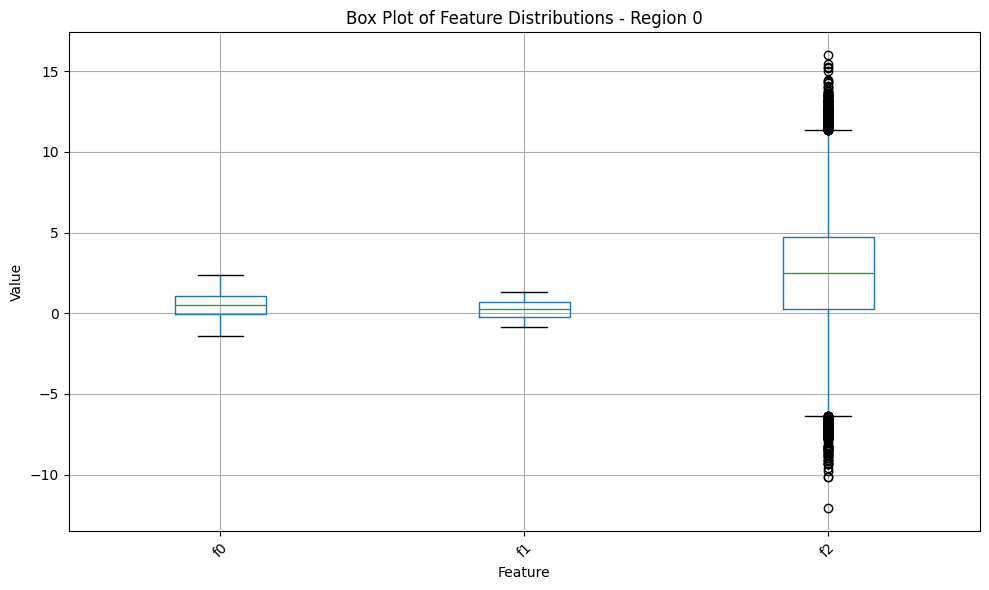

In [43]:
# Define the features to plot
columns_to_plot = ['f0', 'f1', 'f2']

# Create Box Plot for Region 0 Features
plt.figure(figsize=(10, 6))
geo_data_0_clean[columns_to_plot].boxplot()
plt.title('Box Plot of Feature Distributions - Region 0')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<b> Feature `f0` and `f1`:</b> Both features appear to be centered around zero, with a relatively small spread. This suggests that the values of these features are tightly clustered around the mean, with minimal variation.

<b>Feature `f2`:</b> This feature shows significant spread and many outliers on both the lower and upper ends, with values ranging from approximately -10 to 15. The wide range and numerous outliers suggest that this feature has more variability and could be skewed.

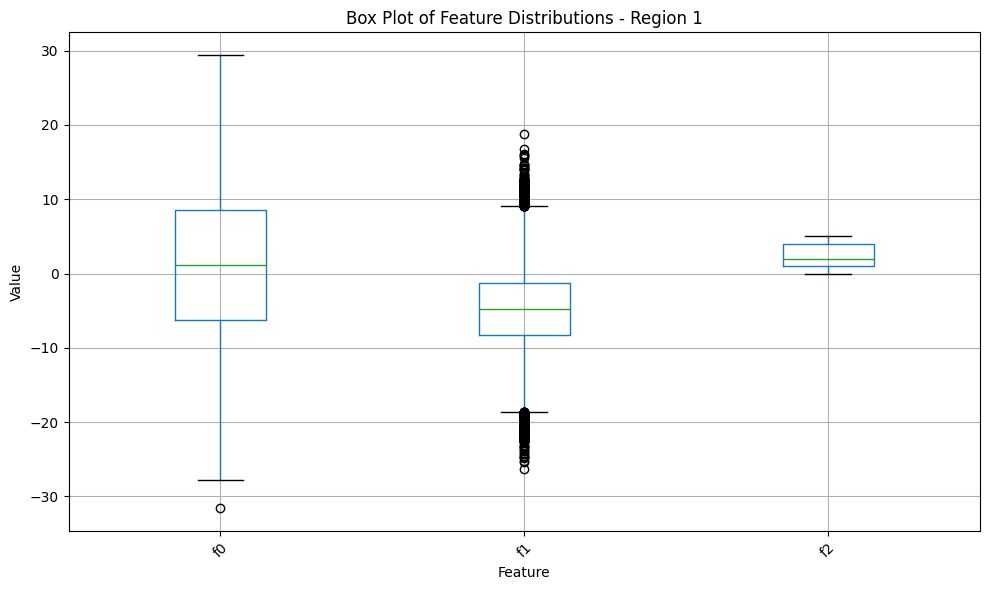

In [44]:
# Create Box Plot for Region 1 Features
plt.figure(figsize=(10, 6))
geo_data_1_clean[columns_to_plot].boxplot()
plt.title('Box Plot of Feature Distributions - Region 1')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In Region 1, feature `f0` has a much wider range than in Region 0, indicating considerable variability. Outliers in both `f0` and `f1` could affect model predictions, especially if these points represent noise or errors. Feature `f2` appears to have a more stable distribution.

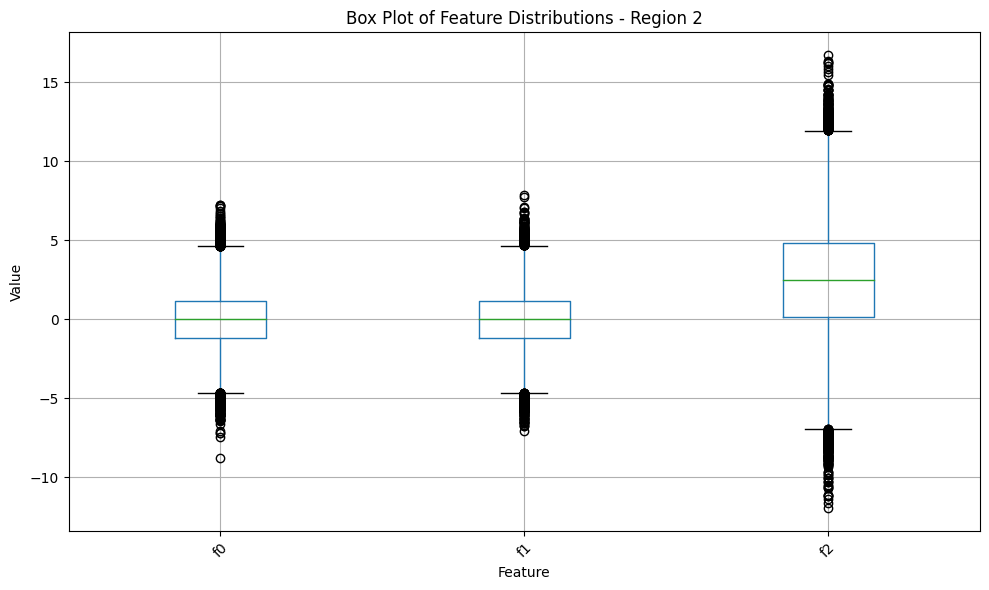

In [45]:
# Create Box Plot for Region 2 Features
plt.figure(figsize=(10, 6))
geo_data_2_clean[columns_to_plot].boxplot()
plt.title('Box Plot of Feature Distributions - Region 2')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In Region 2, feature `f2` again exhibits considerable variability and numerous outliers, similar to Region 0. Features `f0` and `f1` are tightly distributed with minimal variability. Like Region 0, the presence of outliers in `f2` may impact modeling and require further preprocessing.


<b>Overall Analysis</b>

<b>Feature Variability:</b> Across all regions, `f`2 is consistently the most variable feature, with a wide range and numerous outliers. In contrast, `f0` and `f1` tend to have more compact distributions, with some variation in Region 1 (`f0`).

<b>Outliers:</b> Outliers are present in all features across regions, especially in `f2` and `f0` (Region 1). These outliers might affect model performance and should be considered for handling (e.g., through scaling, transformations, or removing extreme values).

<b>Impact on Modeling:</b> Features with a wide range and many outliers, such as `f2`, could introduce instability into models. Feature scaling (such as normalization or standardization) may be necessary to bring all features to the same scale. 

## Model Training and Evaluation for Each Region

We'll start by training a linear regression model for each region to predict oil reserves based on the features provided.

###  Splitting the Data into Training and Validation Sets

We'll split the data into a training set (75%) and a validation set (25%).

In [46]:
# Splitting the data for Region 0
features_0 = geo_data_0.drop(['product', 'id'], axis=1)
target_0 = geo_data_0['product']

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=42)

# Repeat for Region 1
features_1 = geo_data_1.drop(['product', 'id'], axis=1)
target_1 = geo_data_1['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=42)

# Repeat for Region 2
features_2 = geo_data_2.drop(['product', 'id'], axis=1)
target_2 = geo_data_2['product']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=42)

We split the data for each region into a training set (75%) and a validation set (25%) to evaluate our model's performance. The random_state ensures reproducibility.

### Training the Linear Regression Model

We'll train a simple linear regression model for each region.

In [47]:
# Training the model for Region 0
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)

# Repeat for Region 1
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)

# Repeat for Region 2
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)

LinearRegression()

### Making Predictions

After training, we will use the validation sets to make predictions and store them.

In [48]:
# Predicting on validation set for Region 0
predictions_valid_0 = model_0.predict(features_valid_0)

# Repeat for Region 1
predictions_valid_1 = model_1.predict(features_valid_1)

# Repeat for Region 2
predictions_valid_2 = model_2.predict(features_valid_2)

### Calculate RMSE for Each Model

We'll evaluate the models using Root Mean Squared Error (RMSE).

In [49]:
# RMSE for Region 0
rmse_0 = np.sqrt(mean_squared_error(target_valid_0, predictions_valid_0))

# RMSE for Region 1
rmse_1 = np.sqrt(mean_squared_error(target_valid_1, predictions_valid_1))

# RMSE for Region 2
rmse_2 = np.sqrt(mean_squared_error(target_valid_2, predictions_valid_2))

rmse_0, rmse_1, rmse_2

(37.756600350261685, 0.890280100102884, 40.14587231134218)

<b>Findings:</b> We calculated the Root Mean Squared Error (RMSE) for each model across the three regions to evaluate the accuracy of the predictions. The RMSE values are as follows:

- Region 0: 37.76
- Region 1: 0.89
- Region 2: 40.15

The RMSE measures the average magnitude of the prediction error, with lower values indicating better model performance.

<b>Analysis:</b>

- Region 1 has the lowest RMSE (0.89), suggesting that the model for this region makes predictions that are much closer to the actual oil reserves compared to the other regions.
- Region 0 and Region 2 have higher RMSE values (37.76 and 40.15, respectively), indicating less accurate predictions and larger deviations from the actual oil volumes.

While Region 1's model is significantly more accurate, it does not necessarily guarantee the highest profit potential, as profit calculations also depend on oil well volumes, costs, and risk assessments. However, the low RMSE in Region 1 provides confidence in the model's predictions.



## Model Improvments
Now we will standardize the features and split the data using cross-validation to enhance the models.

### Standardizing the Features
We'll use StandardScaler from sklearn.preprocessing to standardize the features.

In [50]:
# Initialize the scaler
scaler = StandardScaler()

# Standardize features for Region 0
features_train_0_scaled = scaler.fit_transform(features_train_0)
features_valid_0_scaled = scaler.transform(features_valid_0)

# Standardize features for Region 1
features_train_1_scaled = scaler.fit_transform(features_train_1)
features_valid_1_scaled = scaler.transform(features_valid_1)

# Standardize features for Region 2
features_train_2_scaled = scaler.fit_transform(features_train_2)
features_valid_2_scaled = scaler.transform(features_valid_2)

### Applying Cross-Validation
We'll apply cross-validation using cross_val_score from sklearn.model_selection to ensure our model generalizes well across different splits.

In [51]:
# Initialize the model
model = LinearRegression()

# Perform cross-validation for Region 0
cv_scores_0 = cross_val_score(model, features_train_0_scaled, target_train_0, cv=5, scoring='neg_mean_squared_error')
rmse_cv_0 = np.sqrt(-cv_scores_0.mean())

# Perform cross-validation for Region 1
cv_scores_1 = cross_val_score(model, features_train_1_scaled, target_train_1, cv=5, scoring='neg_mean_squared_error')
rmse_cv_1 = np.sqrt(-cv_scores_1.mean())

# Perform cross-validation for Region 2
cv_scores_2 = cross_val_score(model, features_train_2_scaled, target_train_2, cv=5, scoring='neg_mean_squared_error')
rmse_cv_2 = np.sqrt(-cv_scores_2.mean())

# Display cross-validation results
rmse_cv_0, rmse_cv_1, rmse_cv_2

(37.67270420941471, 0.8904595971256916, 40.02706157728321)

<b>Findings:</b> We applied 5-fold cross-validation to each model for the three regions to ensure that the model generalizes well across different subsets of the data. The resulting RMSE values for each region after cross-validation are:

- Region 0: 37.67
- Region 1: 0.89
- Region 2: 40.03

The cross-validation results reinforce the finding that Region 1 has the most accurate and robust model, with a significantly lower RMSE than the other two regions. This consistency strengthens the argument for further exploring Region 1 as a potential site for oil well development, though the final decision will also need to incorporate profit and risk analyses.

## Profit Calculations 

### Preparing for Profit Calculation
We need to calculate the volume of oil reserves necessary to break even and compare that with the average predicted volume of reserves in each region.

We already know:

- Budget: 100 million
- Revenue per thousand barrels: $4,500
- Number of oil wells to develop: 200

Let’s calculate the minimum volume of reserves required to avoid losses (break-even point).

### Setting Key Values
Now, we calculate the volume of reserves necessary to break even and store relevant financial values.

In [52]:
# Define constants in uppercase
BUDGET = 100e6  # 100 million dollars
OIL_WELLS_TO_DEVELOP = 200
REVENUE_PER_THOUSAND_BARRELS = 4.5e3  # 4,500 dollars per thousand barrels

# Break-even point (in thousand barrels)
break_even_volume_per_well = BUDGET / (OIL_WELLS_TO_DEVELOP * REVENUE_PER_THOUSAND_BARRELS)

print(f"The minimum volume of reserves per well required to avoid losses: {break_even_volume_per_well:.2f} thousand barrels")



The minimum volume of reserves per well required to avoid losses: 111.11 thousand barrels


The break-even point was calculated based on the project budget, the number of wells to develop (200), and the revenue per thousand barrels of oil ($4,500). The required minimum oil reserves per well to break even is 111.11 thousand barrels.


This break-even point is critical for evaluating the profitability of developing oil wells in each region. The key insight here is that for an oil well to be financially viable, it must produce at least 111.11 thousand barrels of oil. Any region with an average predicted reserve volume lower than this threshold will likely lead to losses, while regions with higher reserves may be profitable.

### Comparing with Average Predicted Reserves in Each Region
Now we’ll calculate the average predicted reserves in each region.

In [53]:
# Average predicted volume for Region 0
avg_pred_volume_0 = predictions_valid_0.mean()

# Average predicted volume for Region 1
avg_pred_volume_1 = predictions_valid_1.mean()

# Average predicted volume for Region 2
avg_pred_volume_2 = predictions_valid_2.mean()

print(f"Average predicted reserves for Region 0: {avg_pred_volume_0:.2f} thousand barrels")
print(f"Average predicted reserves for Region 1: {avg_pred_volume_1:.2f} thousand barrels")
print(f"Average predicted reserves for Region 2: {avg_pred_volume_2:.2f} thousand barrels")


Average predicted reserves for Region 0: 92.40 thousand barrels
Average predicted reserves for Region 1: 68.71 thousand barrels
Average predicted reserves for Region 2: 94.77 thousand barrels


At this stage, none of the regions reach the minimum required reserve volume per well to break even. Although Region 1 continues to perform well in terms of model accuracy (low RMSE), its low predicted reserves make it the least promising region from a financial perspective. The final decision will need to consider profit distributions and risk analyses to determine which region has the highest chance of profitability despite the lower-than-required average reserves.


In [54]:
# Calculate the real average volume for each region
real_avg_volume_0 = target_valid_0.mean()
real_avg_volume_1 = target_valid_1.mean()
real_avg_volume_2 = target_valid_2.mean()

print(f"Real average reserves for Region 0: {real_avg_volume_0:.2f} thousand barrels")
print(f"Real average reserves for Region 1: {real_avg_volume_1:.2f} thousand barrels")
print(f"Real average reserves for Region 2: {real_avg_volume_2:.2f} thousand barrels")


Real average reserves for Region 0: 92.33 thousand barrels
Real average reserves for Region 1: 68.73 thousand barrels
Real average reserves for Region 2: 95.15 thousand barrels


<b>Analysis:</b>

<b>Region 0:</b> The predicted average reserves (92.40) closely match the real reserves (92.33), indicating a highly accurate model.

<b>Region 1:</b> Although the predicted reserves (68.71) are nearly identical to the real reserves (68.73), the low overall volume still makes this region less attractive for development.

<b>Region 2:</b> The predicted reserves (94.77) are quite close to the real reserves (95.15), showing good model performance.

All regions exhibit strong model performance, with predictions closely aligning with actual reserves. However, despite this accuracy, none of the regions meet the required minimum volume per well (111.11 thousand barrels) to break even, necessitating further analysis focused on profit and risk distributions before finalizing decisions.

### Calculating Profit
To calculate profit, we'll select the top 200 wells with the highest predicted oil reserves and compute the total profit.

We’ll define a function to calculate profit based on the selected wells.

In [55]:
def calculate_profit(predictions, target):
    # Select the top 200 wells based on predictions
    top_200_wells = predictions.sort_values(ascending=False)[:OIL_WELLS_TO_DEVELOP]
    selected_reserves = target.loc[top_200_wells.index].sum()
    
    # Calculate total profit
    total_profit = (selected_reserves * REVENUE_PER_THOUSAND_BARRELS) - BUDGET
    return total_profit

# Convert predictions to pandas Series for easy sorting
predictions_valid_0_series = pd.Series(predictions_valid_0, index=target_valid_0.index)
predictions_valid_1_series = pd.Series(predictions_valid_1, index=target_valid_1.index)
predictions_valid_2_series = pd.Series(predictions_valid_2, index=target_valid_2.index)

# Calculate profit for each region
profit_0 = calculate_profit(predictions_valid_0_series, target_valid_0)
profit_1 = calculate_profit(predictions_valid_1_series, target_valid_1)
profit_2 = calculate_profit(predictions_valid_2_series, target_valid_2)

print(f"Profit for Region 0: ${profit_0:.2f}")
print(f"Profit for Region 1: ${profit_1:.2f}")
print(f"Profit for Region 2: ${profit_2:.2f}")

Profit for Region 0: $33591411.14
Profit for Region 1: $24150866.97
Profit for Region 2: $25985717.59


<b>Findings:</b> The profit for each region was calculated by selecting the top 200 wells with the highest predicted reserves and summing their actual reserves. The profits are as follows:

- Region 0: \\$33,591,411.14
- Region 1: \\$24,150,866.97
- Region 2: \\$25,985,717.59

<b>Analysis:</b>

- Region 0 shows the highest potential profit of over \\$33 million, making it the most financially attractive region at this stage.
- Region 1 yields the lowest profit at around \\$24 million, which is consistent with its low average predicted reserves from earlier steps.
- Region 2 falls between Region 0 and Region 1 with a profit of around \\$26 million, but it still lags behind Region 0 by a significant margin.
These calculations provide an important perspective on potential profitability, taking into account the top-performing wells in each region. While the average predicted reserves per well were below the break-even point in all regions, selecting the best-performing wells makes Region 0 the most attractive choice due to its higher total profit.

Region 0 is currently the most promising region for oil well development based on potential profit, followed by Region 2. Region 1 consistently performs poorly in terms of both average reserves and profit. The next step will involve evaluating risk and further refining the selection of the best region for development.

## Calculating Risks and Profit using Bootstrapping
Finally, we’ll use bootstrapping to estimate risks, calculate confidence intervals, and assess the probability of loss for each region.

In [56]:
state = RandomState(42)

def bootstrap_profit(predictions, target, n_samples=1000):
    profits = []
    
    for i in range(n_samples):
        # Randomly select 500 wells with replacement
        subsample = target.sample(n=500, replace=True, random_state=state)
        subsample_predictions = predictions.loc[subsample.index]
        
        # Calculate profit for this sample
        profit = calculate_profit(subsample_predictions, subsample)
        profits.append(profit)
    
    # Convert to a numpy array
    profits = np.array(profits)
    
    # Calculate risk (probability of loss)
    loss_risk = (profits < 0).mean()
    
    # Calculate average profit and 95% confidence interval
    avg_profit = profits.mean()
    confidence_interval = np.percentile(profits, [2.5, 97.5])
    
    return avg_profit, confidence_interval, loss_risk

### Applying Bootstrapping to Each Region
We’ll calculate the average profit, 95% confidence interval, and risk of losses for each region.

In [57]:
# Bootstrapping for Region 0
avg_profit_0, conf_interval_0, risk_0 = bootstrap_profit(predictions_valid_0_series, target_valid_0)

# Bootstrapping for Region 1
avg_profit_1, conf_interval_1, risk_1 = bootstrap_profit(predictions_valid_1_series, target_valid_1)

# Bootstrapping for Region 2
avg_profit_2, conf_interval_2, risk_2 = bootstrap_profit(predictions_valid_2_series, target_valid_2)

# Display results
print(f"Region 0 - Avg. Profit: ${avg_profit_0:.2f}, Confidence Interval: {conf_interval_0}, Risk of Loss: {risk_0:.2%}")
print(f"Region 1 - Avg. Profit: ${avg_profit_1:.2f}, Confidence Interval: {conf_interval_1}, Risk of Loss: {risk_1:.2%}")
print(f"Region 2 - Avg. Profit: ${avg_profit_2:.2f}, Confidence Interval: {conf_interval_2}, Risk of Loss: {risk_2:.2%}")

Region 0 - Avg. Profit: $6061226.32, Confidence Interval: [  100894.11995842 12463709.80564568], Risk of Loss: 2.50%
Region 1 - Avg. Profit: $6624132.05, Confidence Interval: [ 1488000.10967877 11869774.26069637], Risk of Loss: 0.30%
Region 2 - Avg. Profit: $5920520.21, Confidence Interval: [   24648.0077138  12548273.60505053], Risk of Loss: 2.50%


Bootstrapping was applied to each region to assess the risks and potential profits. The results are:

<b>Region 0:</b>
- Average Profit: \\$6,061,226.32
- Confidence Interval: \\$100,894.12 to \\$12,463,709.81
- Risk of Loss: 2.5%

<b>Region 1:</b>
- Average Profit: \\$6,624,132.05
- Confidence Interval: \\$1,488,000.11 to \\$11,869,774.26
- Risk of Loss: 0.3%

<b>Region 2:</b>
- Average Profit: \\$5,920,520.21
- Confidence Interval: \\$24,648.01 to \\$12,548,273.61
- Risk of Loss: 2.5%

<b>Analysis:</b>

Region 1 has the highest average profit of \\$6.6 million, the lowest risk of loss (0.3%), and a narrower confidence interval than Region 0. This suggests that Region 1 offers more stable and consistent returns with minimal risk, even though its average profit only marginally exceeds Region 0.

Region 0 has a slightly lower average profit at \\$6 million, but its confidence interval is broader than Region 1, indicating more variability in the potential outcomes. Additionally, it carries a higher risk of loss (2.5%) than Region 1.

Region 2, with the lowest average profit of \\$5.9 million, also has a risk of loss of 2.5%. Like Region 0, it exhibits significant variability in outcomes, as reflected by its wide confidence interval.

## Conclusion

Although Region 0 initially seemed the most promising based on predicted profit, the bootstrapping analysis shows that Region 1 is the most favorable option. It has the highest average profit, lowest risk, and a relatively stable range of outcomes. Despite Region 0’s high potential profit, the associated risk and variability make Region 1 a more reliable choice for oil well development. Region 2, while not the worst option, lags behind both other regions in terms of average profit.

Given the need to balance profit with acceptable risk, Region 1 is recommended for development.